In [1]:
import pandas as pd
mapping = pd.read_excel('data/liver-ultrasound-detection-unzip/mapping.xlsx')
mapping

,Image File,Annotation File,Source,Type
0,24084.jpg,24084.txt,machine,machine_positive
1,97528.jpg,97528.txt,machine,machine_positive
2,54563.jpg,54563.txt,machine,machine_positive
3,115211.jpg,115211.txt,machine,machine_positive
4,71913.jpg,71913.txt,machine,machine_positive
...,...,...,...,...
19341,1160.jpg,NaN,mobile,mobile_negative
19342,153.jpg,NaN,mobile,mobile_negative
19343,130705.jpg,NaN,mobile,mobile_negative
19344,812.jpg,NaN,mobile,mobile_negative


In [2]:
import os
train_img = os.listdir('data/liver-ultrasound-detection-unzip/images/train')
val_img = os.listdir('data/liver-ultrasound-detection-unzip/images/val')

In [9]:
# !mkdir data/data_yoloclassify
# !mkdir data/data_yoloclassify/train
# !mkdir data/data_yoloclassify/test
# !mkdir data/data_yoloclassify/val

# !mkdir data/data_yoloclassify/train/lesion
# !mkdir data/data_yoloclassify/test/lesion
# !mkdir data/data_yoloclassify/val/lesion

# !mkdir data/data_yoloclassify/train/bg
# !mkdir data/data_yoloclassify/test/bg
# !mkdir data/data_yoloclassify/val/bg

In [10]:
from tqdm import tqdm
for i in tqdm(range(mapping.shape[0])):
    if mapping['Annotation File'].isna()[i]:
        if mapping['Image File'][i] in train_img:
            src_path = 'data/liver-ultrasound-detection-unzip/images/train/' + mapping['Image File'][i]
            des_path = 'data/data_yoloclassify/train/bg/' + mapping['Image File'][i]
            !cp {src_path} {des_path}
        else:
            src_path = 'data/liver-ultrasound-detection-unzip/images/val/' + mapping['Image File'][i]
            des_path = 'data/data_yoloclassify/val/bg/' + mapping['Image File'][i]
            !cp {src_path} {des_path}
    else:
        if mapping['Image File'][i] in train_img:
            src_path = 'data/liver-ultrasound-detection-unzip/images/train/' + mapping['Image File'][i]
            des_path = 'data/data_yoloclassify/train/lesion/' + mapping['Image File'][i]
            !cp {src_path} {des_path}
        else:
            src_path = 'data/liver-ultrasound-detection-unzip/images/val/' + mapping['Image File'][i]
            des_path = 'data/data_yoloclassify/val/lesion/' + mapping['Image File'][i]
            !cp {src_path} {des_path}

100%|██████████| 19346/19346 [44:38<00:00,  7.22it/s]


In [11]:
# from tqdm import tqdm
# for i, cls in tqdm(enumerate(mapping['Type'].values)):
#     if cls[-8:] == 'positive':
#         if mapping['Image File'][i] in train_img:
#             src_path = 'data/liver-ultrasound-detection-unzip/images/train/' + mapping['Image File'][i]
#             des_path = 'data/data_forkeras/pos/' + mapping['Image File'][i]
#             !cp {src_path} {des_path}
#         else:
#             src_path = 'data/liver-ultrasound-detection-unzip/images/val/' + mapping['Image File'][i]
#             des_path = 'data/data_forkeras/pos/' + mapping['Image File'][i]
#             !cp {src_path} {des_path}
#     else:
#         if mapping['Image File'][i] in train_img:
#             src_path = 'data/liver-ultrasound-detection-unzip/images/train/' + mapping['Image File'][i]
#             des_path = 'data/data_forkeras/neg/' + mapping['Image File'][i]
#             !cp {src_path} {des_path}
#         else:
#             src_path = 'data/liver-ultrasound-detection-unzip/images/val/' + mapping['Image File'][i]
#             des_path = 'data/data_forkeras/neg/' + mapping['Image File'][i]
#             !cp {src_path} {des_path}

In [1]:
from ultralytics import YOLO
model = YOLO("yolov8x-cls.pt")

In [2]:
results = model.train(data="data/data_yoloclassify", epochs=100, imgsz=640)

Ultralytics YOLOv8.1.34 🚀 Python-3.9.19 torch-2.3.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40338MiB)
engine/trainer: task=classify, mode=train, model=yolov8x-cls.pt, data=data/data_yoloclassify, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, val_period=1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labe

train: Scanning /lustrefs/disk/project/lt900127-ai24k3/Jupyter/data/data_yoloclassify/train... 14448 images, 0 corrupt: 100%|██████████| 14448/14448 [00:00<?, ?it/s]
val: Scanning /lustrefs/disk/project/lt900127-ai24k3/Jupyter/data/data_yoloclassify/val... 4898 images, 0 corrupt: 100%|██████████| 4898/4898 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 50 weight(decay=0.0), 51 weight(decay=0.0005), 51 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/classify/train4
Starting training for 100 epochs...

      Epoch    GPU_mem       loss  Instances       Size


      1/100      8.65G     0.6679         16        640: 100%|██████████| 903/903 [02:27<00:00,  6.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 154/154 [00:49<00:00,  3.14it/s]

                   all      0.681          1



      Epoch    GPU_mem       loss  Instances       Size


      2/100      8.91G     0.6292         16        640: 100%|██████████| 903/903 [02:00<00:00,  7.50it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 154/154 [00:35<00:00,  4.28it/s]

                   all      0.706          1



      Epoch    GPU_mem       loss  Instances       Size


      3/100      8.91G     0.6109         16        640: 100%|██████████| 903/903 [01:59<00:00,  7.58it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 154/154 [00:37<00:00,  4.09it/s]

                   all      0.726          1



      Epoch    GPU_mem       loss  Instances       Size


      4/100       8.9G     0.5806         16        640: 100%|██████████| 903/903 [01:57<00:00,  7.68it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 154/154 [00:35<00:00,  4.38it/s]

                   all      0.737          1



      Epoch    GPU_mem       loss  Instances       Size


      5/100      8.91G     0.5442         16        640: 100%|██████████| 903/903 [01:57<00:00,  7.67it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 154/154 [00:35<00:00,  4.30it/s]

                   all      0.762          1



      Epoch    GPU_mem       loss  Instances       Size


      6/100      8.91G     0.5184         16        640: 100%|██████████| 903/903 [01:53<00:00,  7.95it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 154/154 [00:37<00:00,  4.12it/s]

                   all      0.771          1



      Epoch    GPU_mem       loss  Instances       Size


      7/100      8.92G     0.4929         16        640: 100%|██████████| 903/903 [01:50<00:00,  8.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 154/154 [00:36<00:00,  4.26it/s]

                   all      0.787          1



      Epoch    GPU_mem       loss  Instances       Size


      8/100       8.9G     0.4575         16        640: 100%|██████████| 903/903 [02:14<00:00,  6.71it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 154/154 [00:36<00:00,  4.25it/s]

                   all      0.784          1



      Epoch    GPU_mem       loss  Instances       Size


      9/100      8.91G     0.4437         16        640: 100%|██████████| 903/903 [02:01<00:00,  7.41it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 154/154 [00:35<00:00,  4.32it/s]

                   all      0.797          1



      Epoch    GPU_mem       loss  Instances       Size


     10/100      8.91G     0.4165         16        640: 100%|██████████| 903/903 [02:01<00:00,  7.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 154/154 [00:36<00:00,  4.22it/s]

                   all      0.795          1



      Epoch    GPU_mem       loss  Instances       Size


     11/100      8.92G     0.4011         16        640: 100%|██████████| 903/903 [01:56<00:00,  7.74it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 154/154 [00:34<00:00,  4.41it/s]

                   all      0.788          1



      Epoch    GPU_mem       loss  Instances       Size


     12/100       8.9G     0.3819         16        640: 100%|██████████| 903/903 [01:50<00:00,  8.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 154/154 [00:35<00:00,  4.33it/s]

                   all      0.817          1



      Epoch    GPU_mem       loss  Instances       Size


     13/100      8.91G     0.3563         16        640: 100%|██████████| 903/903 [01:50<00:00,  8.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 154/154 [00:35<00:00,  4.32it/s]

                   all      0.818          1



      Epoch    GPU_mem       loss  Instances       Size


     14/100      8.91G     0.3438         16        640: 100%|██████████| 903/903 [01:51<00:00,  8.10it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 154/154 [00:35<00:00,  4.30it/s]

                   all      0.804          1



      Epoch    GPU_mem       loss  Instances       Size


     15/100      8.92G     0.3284         16        640: 100%|██████████| 903/903 [01:51<00:00,  8.10it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 154/154 [00:36<00:00,  4.23it/s]

                   all      0.821          1



      Epoch    GPU_mem       loss  Instances       Size


     16/100       8.9G     0.3206         16        640: 100%|██████████| 903/903 [01:51<00:00,  8.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 154/154 [00:35<00:00,  4.30it/s]

                   all      0.827          1



      Epoch    GPU_mem       loss  Instances       Size


     17/100      8.91G     0.2938         16        640: 100%|██████████| 903/903 [01:50<00:00,  8.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 154/154 [00:34<00:00,  4.49it/s]

                   all      0.831          1



      Epoch    GPU_mem       loss  Instances       Size


     18/100      8.91G     0.2971         16        640: 100%|██████████| 903/903 [01:50<00:00,  8.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 154/154 [00:35<00:00,  4.28it/s]

                   all      0.834          1



      Epoch    GPU_mem       loss  Instances       Size


     19/100      8.92G      0.277         16        640: 100%|██████████| 903/903 [01:50<00:00,  8.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 154/154 [00:34<00:00,  4.47it/s]

                   all       0.83          1



      Epoch    GPU_mem       loss  Instances       Size


     20/100       8.9G     0.2696         16        640: 100%|██████████| 903/903 [01:50<00:00,  8.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 154/154 [00:35<00:00,  4.37it/s]

                   all      0.839          1



      Epoch    GPU_mem       loss  Instances       Size


     21/100      8.91G     0.2584         16        640: 100%|██████████| 903/903 [01:51<00:00,  8.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 154/154 [00:34<00:00,  4.42it/s]

                   all      0.837          1



      Epoch    GPU_mem       loss  Instances       Size


     22/100      8.91G     0.2426         16        640: 100%|██████████| 903/903 [01:58<00:00,  7.64it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 154/154 [00:36<00:00,  4.25it/s]

                   all      0.837          1



      Epoch    GPU_mem       loss  Instances       Size


     23/100      8.92G     0.2378         16        640: 100%|██████████| 903/903 [02:09<00:00,  6.97it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 154/154 [00:37<00:00,  4.12it/s]

                   all      0.847          1



      Epoch    GPU_mem       loss  Instances       Size


     24/100       8.9G     0.2319         16        640: 100%|██████████| 903/903 [02:01<00:00,  7.42it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 154/154 [00:36<00:00,  4.17it/s]

                   all      0.844          1



      Epoch    GPU_mem       loss  Instances       Size


     25/100      8.91G     0.2264         16        640: 100%|██████████| 903/903 [02:01<00:00,  7.45it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 154/154 [00:36<00:00,  4.20it/s]

                   all       0.85          1



      Epoch    GPU_mem       loss  Instances       Size


     26/100      8.91G     0.2101         16        640: 100%|██████████| 903/903 [01:55<00:00,  7.80it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 154/154 [00:35<00:00,  4.36it/s]

                   all      0.845          1



      Epoch    GPU_mem       loss  Instances       Size


     27/100      8.92G     0.2043         16        640: 100%|██████████| 903/903 [01:51<00:00,  8.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 154/154 [00:35<00:00,  4.29it/s]

                   all      0.846          1



      Epoch    GPU_mem       loss  Instances       Size


     28/100       8.9G     0.2051         16        640: 100%|██████████| 903/903 [01:50<00:00,  8.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 154/154 [00:34<00:00,  4.43it/s]

                   all      0.854          1



      Epoch    GPU_mem       loss  Instances       Size


     29/100      8.91G     0.1909         16        640: 100%|██████████| 903/903 [01:51<00:00,  8.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 154/154 [00:35<00:00,  4.40it/s]

                   all       0.85          1



      Epoch    GPU_mem       loss  Instances       Size


     30/100      8.91G     0.1803         16        640: 100%|██████████| 903/903 [01:50<00:00,  8.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 154/154 [00:35<00:00,  4.33it/s]

                   all      0.852          1



      Epoch    GPU_mem       loss  Instances       Size


     31/100      8.92G     0.1824         16        640: 100%|██████████| 903/903 [01:50<00:00,  8.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 154/154 [00:36<00:00,  4.23it/s]

                   all      0.852          1



      Epoch    GPU_mem       loss  Instances       Size


     32/100       8.9G     0.1746         16        640: 100%|██████████| 903/903 [01:50<00:00,  8.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 154/154 [00:34<00:00,  4.45it/s]

                   all      0.854          1



      Epoch    GPU_mem       loss  Instances       Size


     33/100      8.91G     0.1812         16        640: 100%|██████████| 903/903 [01:50<00:00,  8.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 154/154 [00:34<00:00,  4.42it/s]

                   all      0.849          1



      Epoch    GPU_mem       loss  Instances       Size


     34/100      8.91G     0.1644         16        640: 100%|██████████| 903/903 [01:50<00:00,  8.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 154/154 [00:35<00:00,  4.40it/s]

                   all      0.854          1



      Epoch    GPU_mem       loss  Instances       Size


     35/100      8.92G     0.1666         16        640: 100%|██████████| 903/903 [01:51<00:00,  8.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 154/154 [00:35<00:00,  4.28it/s]

                   all      0.858          1



      Epoch    GPU_mem       loss  Instances       Size


     36/100       8.9G      0.154         16        640: 100%|██████████| 903/903 [01:50<00:00,  8.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 154/154 [00:34<00:00,  4.41it/s]

                   all      0.851          1



      Epoch    GPU_mem       loss  Instances       Size


     37/100      8.91G     0.1519         16        640: 100%|██████████| 903/903 [01:50<00:00,  8.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 154/154 [00:34<00:00,  4.45it/s]

                   all       0.85          1



      Epoch    GPU_mem       loss  Instances       Size


     38/100      8.91G     0.1525         16        640: 100%|██████████| 903/903 [01:50<00:00,  8.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 154/154 [00:35<00:00,  4.40it/s]

                   all      0.859          1



      Epoch    GPU_mem       loss  Instances       Size


     39/100      8.92G     0.1446         16        640: 100%|██████████| 903/903 [01:50<00:00,  8.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 154/154 [00:34<00:00,  4.41it/s]

                   all      0.853          1



      Epoch    GPU_mem       loss  Instances       Size


     40/100       8.9G     0.1338         16        640: 100%|██████████| 903/903 [01:50<00:00,  8.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 154/154 [00:35<00:00,  4.37it/s]

                   all      0.856          1



      Epoch    GPU_mem       loss  Instances       Size


     41/100      8.91G     0.1263         16        640: 100%|██████████| 903/903 [01:51<00:00,  8.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 154/154 [00:36<00:00,  4.21it/s]

                   all      0.861          1



      Epoch    GPU_mem       loss  Instances       Size


     42/100      8.91G     0.1344         16        640: 100%|██████████| 903/903 [01:51<00:00,  8.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 154/154 [00:35<00:00,  4.37it/s]

                   all       0.86          1



      Epoch    GPU_mem       loss  Instances       Size


     43/100      8.92G     0.1275         16        640: 100%|██████████| 903/903 [01:50<00:00,  8.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 154/154 [00:35<00:00,  4.36it/s]

                   all      0.857          1



      Epoch    GPU_mem       loss  Instances       Size


     44/100       8.9G     0.1269         16        640: 100%|██████████| 903/903 [01:50<00:00,  8.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 154/154 [00:36<00:00,  4.21it/s]

                   all       0.86          1



      Epoch    GPU_mem       loss  Instances       Size


     45/100      8.91G     0.1158         16        640: 100%|██████████| 903/903 [01:50<00:00,  8.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 154/154 [00:34<00:00,  4.43it/s]

                   all       0.86          1



      Epoch    GPU_mem       loss  Instances       Size


     46/100      8.91G     0.1194         16        640: 100%|██████████| 903/903 [01:50<00:00,  8.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 154/154 [00:36<00:00,  4.18it/s]

                   all      0.857          1



      Epoch    GPU_mem       loss  Instances       Size


     47/100      8.92G     0.1145         16        640: 100%|██████████| 903/903 [02:15<00:00,  6.68it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 154/154 [00:35<00:00,  4.37it/s]

                   all      0.862          1



      Epoch    GPU_mem       loss  Instances       Size


     48/100       8.9G     0.1077         16        640: 100%|██████████| 903/903 [02:02<00:00,  7.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 154/154 [00:38<00:00,  3.97it/s]

                   all      0.862          1



      Epoch    GPU_mem       loss  Instances       Size


     49/100      8.91G     0.1106         16        640: 100%|██████████| 903/903 [02:01<00:00,  7.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 154/154 [00:36<00:00,  4.26it/s]

                   all      0.861          1



      Epoch    GPU_mem       loss  Instances       Size


     50/100      8.91G     0.1017         16        640: 100%|██████████| 903/903 [01:57<00:00,  7.68it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 154/154 [00:36<00:00,  4.27it/s]

                   all      0.861          1



      Epoch    GPU_mem       loss  Instances       Size


     51/100      8.92G     0.1028         16        640: 100%|██████████| 903/903 [01:51<00:00,  8.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 154/154 [00:35<00:00,  4.32it/s]

                   all      0.862          1



      Epoch    GPU_mem       loss  Instances       Size


     52/100       8.9G    0.09939         16        640: 100%|██████████| 903/903 [01:50<00:00,  8.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 154/154 [00:35<00:00,  4.38it/s]

                   all      0.861          1



      Epoch    GPU_mem       loss  Instances       Size


     53/100      8.91G    0.09376         16        640: 100%|██████████| 903/903 [01:50<00:00,  8.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 154/154 [00:34<00:00,  4.42it/s]

                   all      0.864          1



      Epoch    GPU_mem       loss  Instances       Size


     54/100      8.91G    0.09872         16        640: 100%|██████████| 903/903 [01:50<00:00,  8.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 154/154 [00:36<00:00,  4.25it/s]

                   all      0.862          1



      Epoch    GPU_mem       loss  Instances       Size


     55/100      8.92G    0.08907         16        640: 100%|██████████| 903/903 [01:50<00:00,  8.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 154/154 [00:36<00:00,  4.26it/s]

                   all      0.861          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 154/154 [00:35<00:00,  4.33it/s]  8.24it/s]

                   all      0.861          1



      Epoch    GPU_mem       loss  Instances       Size


     57/100      8.91G    0.09182         16        640: 100%|██████████| 903/903 [01:50<00:00,  8.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 154/154 [00:35<00:00,  4.33it/s]

                   all      0.863          1



      Epoch    GPU_mem       loss  Instances       Size


     58/100      8.91G    0.08275         16        640: 100%|██████████| 903/903 [01:50<00:00,  8.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 154/154 [00:37<00:00,  4.10it/s]

                   all      0.865          1



      Epoch    GPU_mem       loss  Instances       Size


     59/100      8.92G    0.08302         16        640: 100%|██████████| 903/903 [01:50<00:00,  8.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 154/154 [00:35<00:00,  4.34it/s]

                   all      0.864          1



      Epoch    GPU_mem       loss  Instances       Size


     60/100       8.9G    0.08206         16        640: 100%|██████████| 903/903 [01:50<00:00,  8.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 154/154 [00:35<00:00,  4.31it/s]

                   all      0.865          1



      Epoch    GPU_mem       loss  Instances       Size


     61/100      8.91G     0.0762         16        640: 100%|██████████| 903/903 [01:50<00:00,  8.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 154/154 [00:35<00:00,  4.34it/s]

                   all      0.866          1



      Epoch    GPU_mem       loss  Instances       Size


     62/100      8.91G    0.07617         16        640: 100%|██████████| 903/903 [01:50<00:00,  8.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 154/154 [00:35<00:00,  4.33it/s]

                   all      0.867          1



      Epoch    GPU_mem       loss  Instances       Size


     63/100      8.92G    0.07568         16        640: 100%|██████████| 903/903 [01:50<00:00,  8.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 154/154 [00:34<00:00,  4.46it/s]

                   all      0.867          1



      Epoch    GPU_mem       loss  Instances       Size


     64/100       8.9G    0.06831         16        640: 100%|██████████| 903/903 [01:50<00:00,  8.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 154/154 [00:34<00:00,  4.49it/s]

                   all      0.868          1



      Epoch    GPU_mem       loss  Instances       Size


     65/100      8.91G    0.06375         16        640: 100%|██████████| 903/903 [01:50<00:00,  8.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 154/154 [00:34<00:00,  4.42it/s]

                   all      0.869          1



      Epoch    GPU_mem       loss  Instances       Size


     66/100      8.91G    0.06358         16        640: 100%|██████████| 903/903 [01:50<00:00,  8.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 154/154 [00:34<00:00,  4.43it/s]

                   all      0.869          1



      Epoch    GPU_mem       loss  Instances       Size


     67/100      8.92G    0.07012         16        640: 100%|██████████| 903/903 [01:50<00:00,  8.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 154/154 [00:34<00:00,  4.41it/s]

                   all      0.869          1



      Epoch    GPU_mem       loss  Instances       Size


     68/100       8.9G    0.06187         16        640: 100%|██████████| 903/903 [01:50<00:00,  8.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 154/154 [00:34<00:00,  4.43it/s]

                   all      0.868          1



      Epoch    GPU_mem       loss  Instances       Size


     69/100      8.91G    0.05932         16        640: 100%|██████████| 903/903 [01:50<00:00,  8.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 154/154 [00:35<00:00,  4.32it/s]

                   all      0.869          1



      Epoch    GPU_mem       loss  Instances       Size


     70/100      8.91G    0.06105         16        640: 100%|██████████| 903/903 [01:50<00:00,  8.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 154/154 [00:36<00:00,  4.23it/s]

                   all      0.869          1



      Epoch    GPU_mem       loss  Instances       Size


     71/100      8.92G    0.05532         16        640: 100%|██████████| 903/903 [01:50<00:00,  8.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 154/154 [00:34<00:00,  4.44it/s]

                   all      0.869          1



      Epoch    GPU_mem       loss  Instances       Size


     72/100       8.9G    0.05367         16        640: 100%|██████████| 903/903 [01:50<00:00,  8.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 154/154 [00:38<00:00,  3.99it/s]

                   all       0.87          1



      Epoch    GPU_mem       loss  Instances       Size


     73/100      8.91G    0.05589         16        640: 100%|██████████| 903/903 [01:51<00:00,  8.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 154/154 [00:34<00:00,  4.42it/s]

                   all       0.87          1



      Epoch    GPU_mem       loss  Instances       Size


     74/100      8.91G    0.04331         16        640: 100%|██████████| 903/903 [01:50<00:00,  8.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 154/154 [00:36<00:00,  4.25it/s]

                   all      0.868          1



      Epoch    GPU_mem       loss  Instances       Size


     75/100      8.92G    0.04754         16        640: 100%|██████████| 903/903 [01:51<00:00,  8.08it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 154/154 [00:35<00:00,  4.34it/s]


                   all      0.868          1

      Epoch    GPU_mem       loss  Instances       Size


     76/100       8.9G    0.04522         16        640: 100%|██████████| 903/903 [01:50<00:00,  8.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 154/154 [00:35<00:00,  4.37it/s]

                   all      0.868          1



      Epoch    GPU_mem       loss  Instances       Size


     78/100      8.91G    0.04219         16        640: 100%|██████████| 903/903 [01:51<00:00,  8.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 154/154 [00:34<00:00,  4.41it/s]

                   all      0.865          1



      Epoch    GPU_mem       loss  Instances       Size


     79/100      8.92G    0.03916         16        640: 100%|██████████| 903/903 [01:50<00:00,  8.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 154/154 [00:35<00:00,  4.35it/s]

                   all      0.866          1



      Epoch    GPU_mem       loss  Instances       Size


     80/100       8.9G    0.04132         16        640: 100%|██████████| 903/903 [01:50<00:00,  8.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 154/154 [00:35<00:00,  4.33it/s]

                   all      0.866          1



      Epoch    GPU_mem       loss  Instances       Size


     81/100      8.91G    0.04041         16        640: 100%|██████████| 903/903 [01:50<00:00,  8.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 154/154 [00:34<00:00,  4.49it/s]

                   all      0.867          1



      Epoch    GPU_mem       loss  Instances       Size


     82/100      8.91G    0.03675         16        640: 100%|██████████| 903/903 [01:50<00:00,  8.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 154/154 [00:34<00:00,  4.44it/s]

                   all      0.867          1



      Epoch    GPU_mem       loss  Instances       Size


     83/100      8.92G    0.03489         16        640: 100%|██████████| 903/903 [01:50<00:00,  8.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 154/154 [00:35<00:00,  4.40it/s]

                   all      0.867          1



      Epoch    GPU_mem       loss  Instances       Size


     84/100       8.9G    0.03623         16        640: 100%|██████████| 903/903 [01:50<00:00,  8.17it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 154/154 [00:34<00:00,  4.40it/s]

                   all      0.867          1



      Epoch    GPU_mem       loss  Instances       Size


     85/100      8.91G    0.03373         16        640: 100%|██████████| 903/903 [01:50<00:00,  8.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 154/154 [00:36<00:00,  4.25it/s]

                   all      0.867          1



      Epoch    GPU_mem       loss  Instances       Size


     86/100      8.91G    0.03218         16        640: 100%|██████████| 903/903 [01:50<00:00,  8.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 154/154 [00:34<00:00,  4.43it/s]

                   all      0.867          1



      Epoch    GPU_mem       loss  Instances       Size


     87/100      8.92G    0.02985         16        640: 100%|██████████| 903/903 [01:50<00:00,  8.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 154/154 [00:36<00:00,  4.27it/s]

                   all      0.867          1



      Epoch    GPU_mem       loss  Instances       Size


     88/100       8.9G    0.02643         16        640: 100%|██████████| 903/903 [01:50<00:00,  8.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 154/154 [00:36<00:00,  4.22it/s]

                   all      0.867          1



      Epoch    GPU_mem       loss  Instances       Size


     89/100      8.91G    0.03004         16        640: 100%|██████████| 903/903 [01:50<00:00,  8.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 154/154 [00:34<00:00,  4.42it/s]

                   all      0.867          1



      Epoch    GPU_mem       loss  Instances       Size


     90/100      8.91G    0.02498         16        640: 100%|██████████| 903/903 [01:50<00:00,  8.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 154/154 [00:35<00:00,  4.39it/s]

                   all      0.868          1



      Epoch    GPU_mem       loss  Instances       Size


     91/100      8.92G    0.02414         16        640: 100%|██████████| 903/903 [01:52<00:00,  8.02it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 154/154 [00:35<00:00,  4.38it/s]

                   all      0.868          1



      Epoch    GPU_mem       loss  Instances       Size


     92/100       8.9G    0.02238         16        640: 100%|██████████| 903/903 [01:50<00:00,  8.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 154/154 [00:36<00:00,  4.27it/s]

                   all      0.868          1



      Epoch    GPU_mem       loss  Instances       Size


     93/100      8.91G    0.02276         16        640: 100%|██████████| 903/903 [01:50<00:00,  8.17it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 154/154 [00:34<00:00,  4.40it/s]

                   all      0.868          1



      Epoch    GPU_mem       loss  Instances       Size


     94/100      8.91G    0.02265         16        640: 100%|██████████| 903/903 [01:50<00:00,  8.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 154/154 [00:35<00:00,  4.39it/s]

                   all      0.868          1



      Epoch    GPU_mem       loss  Instances       Size


     95/100      8.92G    0.02194         16        640: 100%|██████████| 903/903 [01:53<00:00,  7.97it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 154/154 [00:36<00:00,  4.22it/s]


                   all      0.868          1

      Epoch    GPU_mem       loss  Instances       Size


     96/100       8.9G    0.02139         16        640: 100%|██████████| 903/903 [01:50<00:00,  8.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 154/154 [00:34<00:00,  4.42it/s]

                   all      0.868          1



      Epoch    GPU_mem       loss  Instances       Size


     97/100      8.91G    0.02041         16        640: 100%|██████████| 903/903 [01:50<00:00,  8.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 154/154 [00:34<00:00,  4.44it/s]

                   all      0.868          1



      Epoch    GPU_mem       loss  Instances       Size


     98/100      8.91G    0.01937         16        640: 100%|██████████| 903/903 [01:51<00:00,  8.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 154/154 [00:35<00:00,  4.36it/s]

                   all      0.869          1



      Epoch    GPU_mem       loss  Instances       Size


     99/100      8.92G    0.02356         16        640: 100%|██████████| 903/903 [01:50<00:00,  8.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 154/154 [00:35<00:00,  4.35it/s]

                   all       0.87          1



      Epoch    GPU_mem       loss  Instances       Size


    100/100       8.9G     0.0175         16        640: 100%|██████████| 903/903 [01:50<00:00,  8.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 154/154 [00:35<00:00,  4.28it/s]

                   all       0.87          1



100 epochs completed in 4.182 hours.
Optimizer stripped from runs/classify/train4/weights/last.pt, 112.5MB
Optimizer stripped from runs/classify/train4/weights/best.pt, 112.5MB

Validating runs/classify/train4/weights/best.pt...
Ultralytics YOLOv8.1.34 🚀 Python-3.9.19 torch-2.3.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40338MiB)
YOLOv8x-cls summary (fused): 133 layers, 56125762 parameters, 0 gradients, 153.8 GFLOPs
train: /lustrefs/disk/project/lt900127-ai24k3/Jupyter/data/data_yoloclassify/train... found 14448 images in 2 classes ✅ 
val: /lustrefs/disk/project/lt900127-ai24k3/Jupyter/data/data_yoloclassify/val... found 4898 images in 2 classes ✅ 
test: /lustrefs/disk/project/lt900127-ai24k3/Jupyter/data/data_yoloclassify/test... found 0 images in 0 classes: WARNING ⚠️ no images found


               classes   top1_acc   top5_acc: 100%|██████████| 154/154 [00:36<00:00,  4.27it/s]


                   all       0.87          1
Speed: 0.2ms preprocess, 3.3ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train4
Results saved to runs/classify/train4


In [1]:
!nvidia-smi

Fri May 31 00:04:57 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  On   | 00000000:03:00.0 Off |                    0 |
| N/A   53C    P0   232W / 400W |  38883MiB / 40960MiB |     99%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA A100-SXM...  On   | 00000000:41:00.0 Off |                    0 |
| N/A   

In [9]:
model_class = YOLO("runs/classify/train4/weights/best.pt")  

In [4]:
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.top1  # top1 accuracy
metrics.top5  # top5 accuracy

Ultralytics YOLOv8.1.34 🚀 Python-3.9.19 torch-2.3.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40338MiB)
YOLOv8x-cls summary (fused): 133 layers, 56125762 parameters, 0 gradients, 153.8 GFLOPs
train: /lustrefs/disk/project/lt900127-ai24k3/Jupyter/data/data_yoloclassify/train... found 14448 images in 2 classes ✅ 
val: /lustrefs/disk/project/lt900127-ai24k3/Jupyter/data/data_yoloclassify/val... found 4898 images in 2 classes ✅ 
test: /lustrefs/disk/project/lt900127-ai24k3/Jupyter/data/data_yoloclassify/test... found 0 images in 0 classes: WARNING ⚠️ no images found


val: Scanning /lustrefs/disk/project/lt900127-ai24k3/Jupyter/data/data_yoloclassify/val... 4898 images, 0 corrupt: 100%|██████████| 4898/4898 [00:00<?, ?it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 307/307 [00:39<00:00,  7.77it/s]


                   all       0.87          1
Speed: 0.2ms preprocess, 3.7ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/val


1.0

In [6]:
import pandas as pd
sample_submission = pd.read_csv('data/liver-ultrasound-detection-unzip/sample_submission.csv')
submission = sample_submission.copy()
submission

,Image File,Annotation,Label
0,18999,"[[281, 183, 339, 266]]",[1]
1,102037,"[[263, 171, 359, 263]]",[4]
2,138340,"[[85, 235, 178, 333]]",[4]
3,140589,NaN,NaN
4,20235,NaN,NaN
...,...,...,...
5148,3575,NaN,NaN
5149,190,NaN,NaN
5150,1404,NaN,NaN
5151,184,NaN,NaN


In [7]:
sample_submission.loc[~sample_submission['Annotation'].isna().values, 'Annotation']

0                             [[281, 183, 339, 266]]
1                             [[263, 171, 359, 263]]
2                              [[85, 235, 178, 333]]
24      [[270, 195, 335, 253], [268, 264, 316, 286]]
115     [[387, 268, 513, 361], [427, 203, 456, 237]]
1001                                              []
Name: Annotation, dtype: object

In [8]:
index_sample = sample_submission.loc[~sample_submission['Annotation'].isna().values, 'Annotation'].index
index_sample

Index([0, 1, 2, 24, 115, 1001], dtype='int64')

In [29]:
model = YOLO('runs_yoloV9e/detect/train14/weights/best.pt')

In [ ]:
from tqdm.notebook import tqdm, trange
for i in trange(submission.shape[0]):
    if i in index_sample:
        continue
    if model_class('data/liver-ultrasound-detection-unzip/images/test/' + str(submission.iloc[i, 0]) + '.jpg')[0].probs.top1 == 1:
        results = model('data/liver-ultrasound-detection-unzip/images/test/' + str(submission.iloc[i, 0]) + '.jpg', conf=0.4, verbose=False)
        submission.loc[i,'Annotation'] = str(results[0].boxes.xyxy.round().cpu().numpy().astype(int).tolist())
        submission.loc[i,'Label'] = str(results[0].boxes.cls.cpu().numpy().astype(int).tolist())
    else:
        submission.loc[i,'Annotation'] = '[]'
        submission.loc[i,'Label'] = '[]'

  0%|          | 0/5153 [00:00<?, ?it/s]


image 1/1 /lustrefs/disk/project/lt900127-ai24k3/Jupyter/data/liver-ultrasound-detection-unzip/images/test/140589.jpg: 640x640 lesion 1.00, bg 0.00, 1548.2ms
Speed: 1821.8ms preprocess, 1548.2ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /lustrefs/disk/project/lt900127-ai24k3/Jupyter/data/liver-ultrasound-detection-unzip/images/test/20235.jpg: 640x640 lesion 1.00, bg 0.00, 5.9ms
Speed: 11.2ms preprocess, 5.9ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /lustrefs/disk/project/lt900127-ai24k3/Jupyter/data/liver-ultrasound-detection-unzip/images/test/68271.jpg: 640x640 lesion 1.00, bg 0.00, 5.8ms
Speed: 11.1ms preprocess, 5.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /lustrefs/disk/project/lt900127-ai24k3/Jupyter/data/liver-ultrasound-detection-unzip/images/test/102209.jpg: 640x640 lesion 0.99, bg 0.01, 5.8ms
Speed: 8.7ms preprocess, 5.8ms inference, 0.0ms postprocess per image at shape 

In [44]:
submission

,Image File,Annotation,Label
0,18999,"[[281, 183, 339, 266]]",[1]
1,102037,"[[263, 171, 359, 263]]",[4]
2,138340,"[[85, 235, 178, 333]]",[4]
3,140589,"[[597, 375, 659, 439]]",[4]
4,20235,"[[295, 115, 341, 151]]",[1]
...,...,...,...
5148,3575,[],[]
5149,190,[],[]
5150,1404,[],[]
5151,184,[],[]


In [45]:
print(submission.loc[0, 'Label'] == sample_submission.loc[0, 'Label'])
print(submission.loc[1, 'Label'] == sample_submission.loc[1, 'Label'])
print(submission.loc[2, 'Label'] == sample_submission.loc[2, 'Label'])
print(submission.loc[24, 'Label'] == sample_submission.loc[24, 'Label'])
print(submission.loc[115, 'Label'] == sample_submission.loc[115, 'Label'])
print(submission.loc[1001, 'Label'] == sample_submission.loc[1001, 'Label'])

True
True
True
True
True
True


In [46]:
sum(submission['Label'] == '[]')

3666

In [48]:
submission.to_csv('submission_yoloV9e39ep_class_conf04.csv', index = False)

In [49]:
sum(submission['Annotation'] == pd.read_csv('submission_yoloV9e39ep_conf04.csv')['Annotation'])

5024

In [70]:
from tensorflow.keras.utils import image_dataset_from_directory

img_height, img_width, batch_size = 224, 224, 64

train_ds = image_dataset_from_directory(
  'data/data_forkeras',
  validation_split=0.2,
  subset="training",
  seed=693,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  'data/data_forkeras',
  validation_split=0.2,
  subset="validation",
  seed=693,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 19346 files belonging to 2 classes.
Using 15477 files for training.
Found 19346 files belonging to 2 classes.
Using 3869 files for validation.


2024-05-30 21:30:18.879171: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [15477]
	 [[{{node Placeholder/_0}}]]
2024-05-30 21:30:18.879482: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [15477]
	 [[{{node Placeholder/_4}}]]


(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)


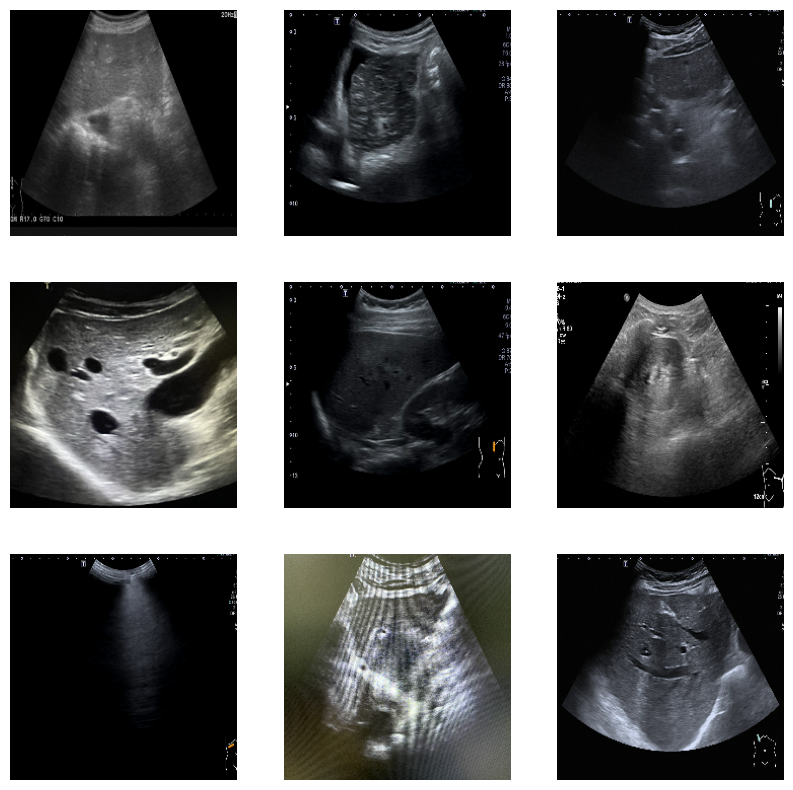

In [79]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    print(images[i].numpy().shape)
    plt.imshow(images[i].numpy().astype("uint8"))
    # plt.title(class_names[labels[i]])
    plt.axis("off")

In [48]:
!nvidia-smi

Thu May 30 19:51:02 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  On   | 00000000:03:00.0 Off |                    0 |
| N/A   60C    P0   348W / 400W |  39369MiB / 40960MiB |     95%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA A100-SXM...  On   | 00000000:41:00.0 Off |                    0 |
| N/A   

In [71]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import load_model

# Load the VGG19 model structure
vgg19 = VGG19(weights=None, include_top=None, input_shape = (224, 224, 3))  # Initialize model without pre-trained weights

# Load the weights from the .h5 file
vgg19.load_weights('vgg19_weights_tf_dim_ordering_tf_kernels_notop.h5')

In [80]:
# Add custom top layers
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
x = vgg19.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)  # Add a fully connected layer
predictions = Dense(1, activation='sigmoid')(x)  # Add a classification layer (adjust the number of classes as needed)

# Create the final model
model = Model(inputs=vgg19.input, outputs=predictions)

In [82]:
model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [96]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [97]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  4


In [99]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=3
)

Epoch 1/3


2024-05-30 21:51:03.093838: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:429] Could not create cudnn handle: CUDNN_STATUS_NOT_INITIALIZED
2024-05-30 21:51:03.093907: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:434] Error retrieving driver version: NOT_FOUND: could not find kernel module information in driver version file contents: "NVRM version: NVIDIA UNIX Open Kernel Module for x86_64  525.105.17  Release Build  (dvs-builder@U16-T02-30-1)  Tue Mar 28 22:29:15 UTC 2023
GCC version:  gcc version 7.5.0 (SUSE Linux) 
"
2024-05-30 21:51:03.102701: W tensorflow/core/framework/op_kernel.cc:1830] OP_REQUIRES failed at conv_ops_fused_impl.h:625 : UNIMPLEMENTED: DNN library is not found.
2024-05-30 21:51:03.102775: I tensorflow/core/common_runtime/executor.cc:1197] [/job:localhost/replica:0/task:0/device:GPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): UNIMPLEMENTED: DNN library is not found.
	 [[{{node 

UnimplementedError: Graph execution error:

Detected at node 'model_7/block1_conv1/Relu' defined at (most recent call last):
    File "/lustrefs/disk/project/lt900127-ai24k3/Jupyter/env/lib/python3.9/runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/lustrefs/disk/project/lt900127-ai24k3/Jupyter/env/lib/python3.9/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/lustrefs/disk/project/lt900127-ai24k3/Jupyter/env/lib/python3.9/site-packages/ipykernel_launcher.py", line 18, in <module>
      app.launch_new_instance()
    File "/lustrefs/disk/project/lt900127-ai24k3/Jupyter/env/lib/python3.9/site-packages/traitlets/config/application.py", line 1075, in launch_instance
      app.start()
    File "/lustrefs/disk/project/lt900127-ai24k3/Jupyter/env/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 739, in start
      self.io_loop.start()
    File "/lustrefs/disk/project/lt900127-ai24k3/Jupyter/env/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 205, in start
      self.asyncio_loop.run_forever()
    File "/lustrefs/disk/project/lt900127-ai24k3/Jupyter/env/lib/python3.9/asyncio/base_events.py", line 601, in run_forever
      self._run_once()
    File "/lustrefs/disk/project/lt900127-ai24k3/Jupyter/env/lib/python3.9/asyncio/base_events.py", line 1905, in _run_once
      handle._run()
    File "/lustrefs/disk/project/lt900127-ai24k3/Jupyter/env/lib/python3.9/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/lustrefs/disk/project/lt900127-ai24k3/Jupyter/env/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue
      await self.process_one()
    File "/lustrefs/disk/project/lt900127-ai24k3/Jupyter/env/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 534, in process_one
      await dispatch(*args)
    File "/lustrefs/disk/project/lt900127-ai24k3/Jupyter/env/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell
      await result
    File "/lustrefs/disk/project/lt900127-ai24k3/Jupyter/env/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 359, in execute_request
      await super().execute_request(stream, ident, parent)
    File "/lustrefs/disk/project/lt900127-ai24k3/Jupyter/env/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 778, in execute_request
      reply_content = await reply_content
    File "/lustrefs/disk/project/lt900127-ai24k3/Jupyter/env/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 446, in do_execute
      res = shell.run_cell(
    File "/lustrefs/disk/project/lt900127-ai24k3/Jupyter/env/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 549, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/lustrefs/disk/project/lt900127-ai24k3/Jupyter/env/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3048, in run_cell
      result = self._run_cell(
    File "/lustrefs/disk/project/lt900127-ai24k3/Jupyter/env/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3103, in _run_cell
      result = runner(coro)
    File "/lustrefs/disk/project/lt900127-ai24k3/Jupyter/env/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/lustrefs/disk/project/lt900127-ai24k3/Jupyter/env/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3308, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/lustrefs/disk/project/lt900127-ai24k3/Jupyter/env/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3490, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/lustrefs/disk/project/lt900127-ai24k3/Jupyter/env/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3550, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_60461/2386738274.py", line 1, in <module>
      model.fit(
    File "/lustrefs/disk/project/lt900127-ai24k3/Jupyter/env/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/lustrefs/disk/project/lt900127-ai24k3/Jupyter/env/lib/python3.9/site-packages/keras/engine/training.py", line 1685, in fit
      tmp_logs = self.train_function(iterator)
    File "/lustrefs/disk/project/lt900127-ai24k3/Jupyter/env/lib/python3.9/site-packages/keras/engine/training.py", line 1284, in train_function
      return step_function(self, iterator)
    File "/lustrefs/disk/project/lt900127-ai24k3/Jupyter/env/lib/python3.9/site-packages/keras/engine/training.py", line 1268, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/lustrefs/disk/project/lt900127-ai24k3/Jupyter/env/lib/python3.9/site-packages/keras/engine/training.py", line 1249, in run_step
      outputs = model.train_step(data)
    File "/lustrefs/disk/project/lt900127-ai24k3/Jupyter/env/lib/python3.9/site-packages/keras/engine/training.py", line 1050, in train_step
      y_pred = self(x, training=True)
    File "/lustrefs/disk/project/lt900127-ai24k3/Jupyter/env/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/lustrefs/disk/project/lt900127-ai24k3/Jupyter/env/lib/python3.9/site-packages/keras/engine/training.py", line 558, in __call__
      return super().__call__(*args, **kwargs)
    File "/lustrefs/disk/project/lt900127-ai24k3/Jupyter/env/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/lustrefs/disk/project/lt900127-ai24k3/Jupyter/env/lib/python3.9/site-packages/keras/engine/base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/lustrefs/disk/project/lt900127-ai24k3/Jupyter/env/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/lustrefs/disk/project/lt900127-ai24k3/Jupyter/env/lib/python3.9/site-packages/keras/engine/functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "/lustrefs/disk/project/lt900127-ai24k3/Jupyter/env/lib/python3.9/site-packages/keras/engine/functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/lustrefs/disk/project/lt900127-ai24k3/Jupyter/env/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/lustrefs/disk/project/lt900127-ai24k3/Jupyter/env/lib/python3.9/site-packages/keras/engine/base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/lustrefs/disk/project/lt900127-ai24k3/Jupyter/env/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/lustrefs/disk/project/lt900127-ai24k3/Jupyter/env/lib/python3.9/site-packages/keras/layers/convolutional/base_conv.py", line 321, in call
      return self.activation(outputs)
    File "/lustrefs/disk/project/lt900127-ai24k3/Jupyter/env/lib/python3.9/site-packages/keras/activations.py", line 317, in relu
      return backend.relu(
    File "/lustrefs/disk/project/lt900127-ai24k3/Jupyter/env/lib/python3.9/site-packages/keras/backend.py", line 5396, in relu
      x = tf.nn.relu(x)
Node: 'model_7/block1_conv1/Relu'
DNN library is not found.
	 [[{{node model_7/block1_conv1/Relu}}]] [Op:__inference_train_function_19480]

In [ ]:
# we use VGG16 as per our requirement not use whole 
vgg.trainable = False

flatten = vgg.output

flatten = Flatten()(flatten)

In [ ]:
# Lets make bboxhead
bboxhead = Dense(128,activation="relu")(flatten)
bboxhead = Dense(64,activation="relu")(bboxhead)
bboxhead = Dense(32,activation="relu")(bboxhead)
bboxhead = Dense(4,activation="relu")(bboxhead)

In [ ]:
# lets import Model
from tensorflow.keras.models import Model
model = Model(inputs = vgg.input,outputs = bboxhead)

In [ ]:
model.summary()